<a href="https://colab.research.google.com/github/Adi8885/portfolio/blob/main/multivariate_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import psutil
import time

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf


matplotlib.rcParams['figure.figsize'] = (30,20)

In [2]:
def get_memory_details():
    mem_details = psutil.virtual_memory()
    factor =  1024 * 1024 * 1024
    total = round(mem_details[0] / factor , 2)
    available = round(mem_details[1] / factor , 2)
    used = round(mem_details[3] / factor , 2)
    free = round(mem_details[4] / factor , 2)
    percent_used = mem_details[2]
    print('total : {} GB | available : {} GB | used : {} GB |free : {} GB | Percent Used = {} | Percent free : {}\n'.format(total 
                                                                                                    , available
                                                                                                   , used
                                                                                                   , free
                                                                                                   , percent_used
                                                                                                    , 100 - percent_used))
get_memory_details()

total : 12.72 GB | available : 11.82 GB | used : 0.64 GB |free : 10.12 GB | Percent Used = 7.0 | Percent free : 93.0



In [3]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
file_path = ''
data = pd.read_csv(filepath_or_buffer = file_path + file_name 
                   , low_memory = False)

data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
data.shape

(19735, 29)

In [5]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
data['date'] = pd.to_datetime(data['date'] 
                              , infer_datetime_format=True)

data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e8d6d32b0>,
      dtype=object)

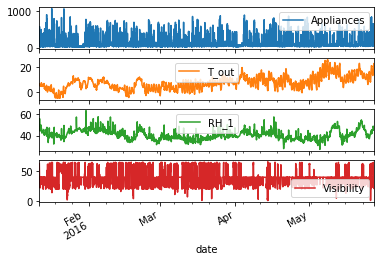

In [8]:
model_data = data.set_index('date')[['Appliances','T_out', 'RH_1','Visibility']]

model_data.plot(subplots = True)

In [9]:
scaler = MinMaxScaler()
model_data_scaled = scaler.fit_transform(model_data)
model_data_scaled.shape

(19735, 4)

In [10]:
X = model_data_scaled
Y = model_data_scaled[:,0]
print('X  : {}'.format(X.shape))
print('Y  : {}'.format(Y.shape))

X  : (19735, 4)
Y  : (19735,)


In [11]:
#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7 , shuffle = False)

In [12]:
print('x_train  : {}'.format(x_train.shape))
print('y_train  : {}'.format(y_train.shape))

print('x_test  : {}'.format(x_test.shape))
print('y_test  : {}'.format(y_test.shape))

x_train  : (15788, 4)
y_train  : (15788,)
x_test  : (3947, 4)
y_test  : (3947,)


In [13]:
window_length = 720
batch_size = 32
num_features = 4
train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train , y_train , length = window_length ,sampling_rate = 1 , batch_size = batch_size)
test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test , y_test , length = window_length ,sampling_rate = 1 , batch_size = batch_size)

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (window_length , num_features) , return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64 , return_sequences = False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))
model.summary()      

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 720, 128)          68096     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 720, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 720, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 720, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 720, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss'
                                                  , patience = 2 
                                                  , mode = 'min')

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.losses.MeanAbsoluteError()])

history = model.fit_generator(train_generator
                              , epochs=50
                              ,validation_data=test_generator
                              ,shuffle=False
                              ,callbacks=[early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
471/471 [==============================] - 45s 96ms/step - loss: 0.0087 - mean_absolute_error: 0.0520 - val_loss: 0.0059 - val_mean_absolute_error: 0.0508
Epoch 2/50
471/471 [==============================] - 44s 94ms/step - loss: 0.0068 - mean_absolute_error: 0.0434 - val_loss: 0.0048 - val_mean_absolute_error: 0.0436
Epoch 3/50
471/471 [==============================] - 44s 94ms/step - loss: 0.0048 - mean_absolute_error: 0.0350 - val_loss: 0.0033 - val_mean_absolute_error: 0.0294
Epoch 4/50
471/471 [==============================] - 44s 94ms/step - loss: 0.0043 - mean_absolute_error: 0.0323 - val_loss: 0.0032 - val_mean_absolute_error: 0.0279
Epoch 5/50
471/471 [==============================] - 44s 94ms/step - loss: 0.0041 - mean_absolute_error: 0.0314 - val_loss: 0.0032 - val_mean_absolute_error: 0.0277
Epoch 6/50
471/471 [==============================] - 44s 94ms/step - loss: 0.0041 - mean_abso

In [16]:
model.evaluate_generator(test_generator , verbose=0)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.0031661936081945896, 0.027612578123807907]

In [17]:
predictions = model.predict_generator(test_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


In [18]:
predictions.shape

(3227, 1)

In [19]:
y_test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [20]:
x_test

array([[0.3364486 , 0.34297964, 0.30923768, 0.6       ],
       [0.54205607, 0.34726688, 0.3055683 , 0.6       ],
       [0.28971963, 0.35155413, 0.30455921, 0.6       ],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [21]:
x_test[:,1:][window_length:]

array([[0.45337621, 0.20851298, 0.6       ],
       [0.47106109, 0.18282726, 0.6       ],
       [0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

In [23]:
df_pred = pd.concat([pd.DataFrame(predictions) ,pd.DataFrame(x_test[:,1:][window_length:])],axis = 1 )

In [24]:
rev_trans = scaler.inverse_transform(df_pred)

In [25]:
df_final = model_data[predictions.shape[0]*-1:]

In [26]:
df_final['App_Pred'] = rev_trans[:,0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_final.count()

Appliances    3227
T_out         3227
RH_1          3227
Visibility    3227
App_Pred      3227
dtype: int64

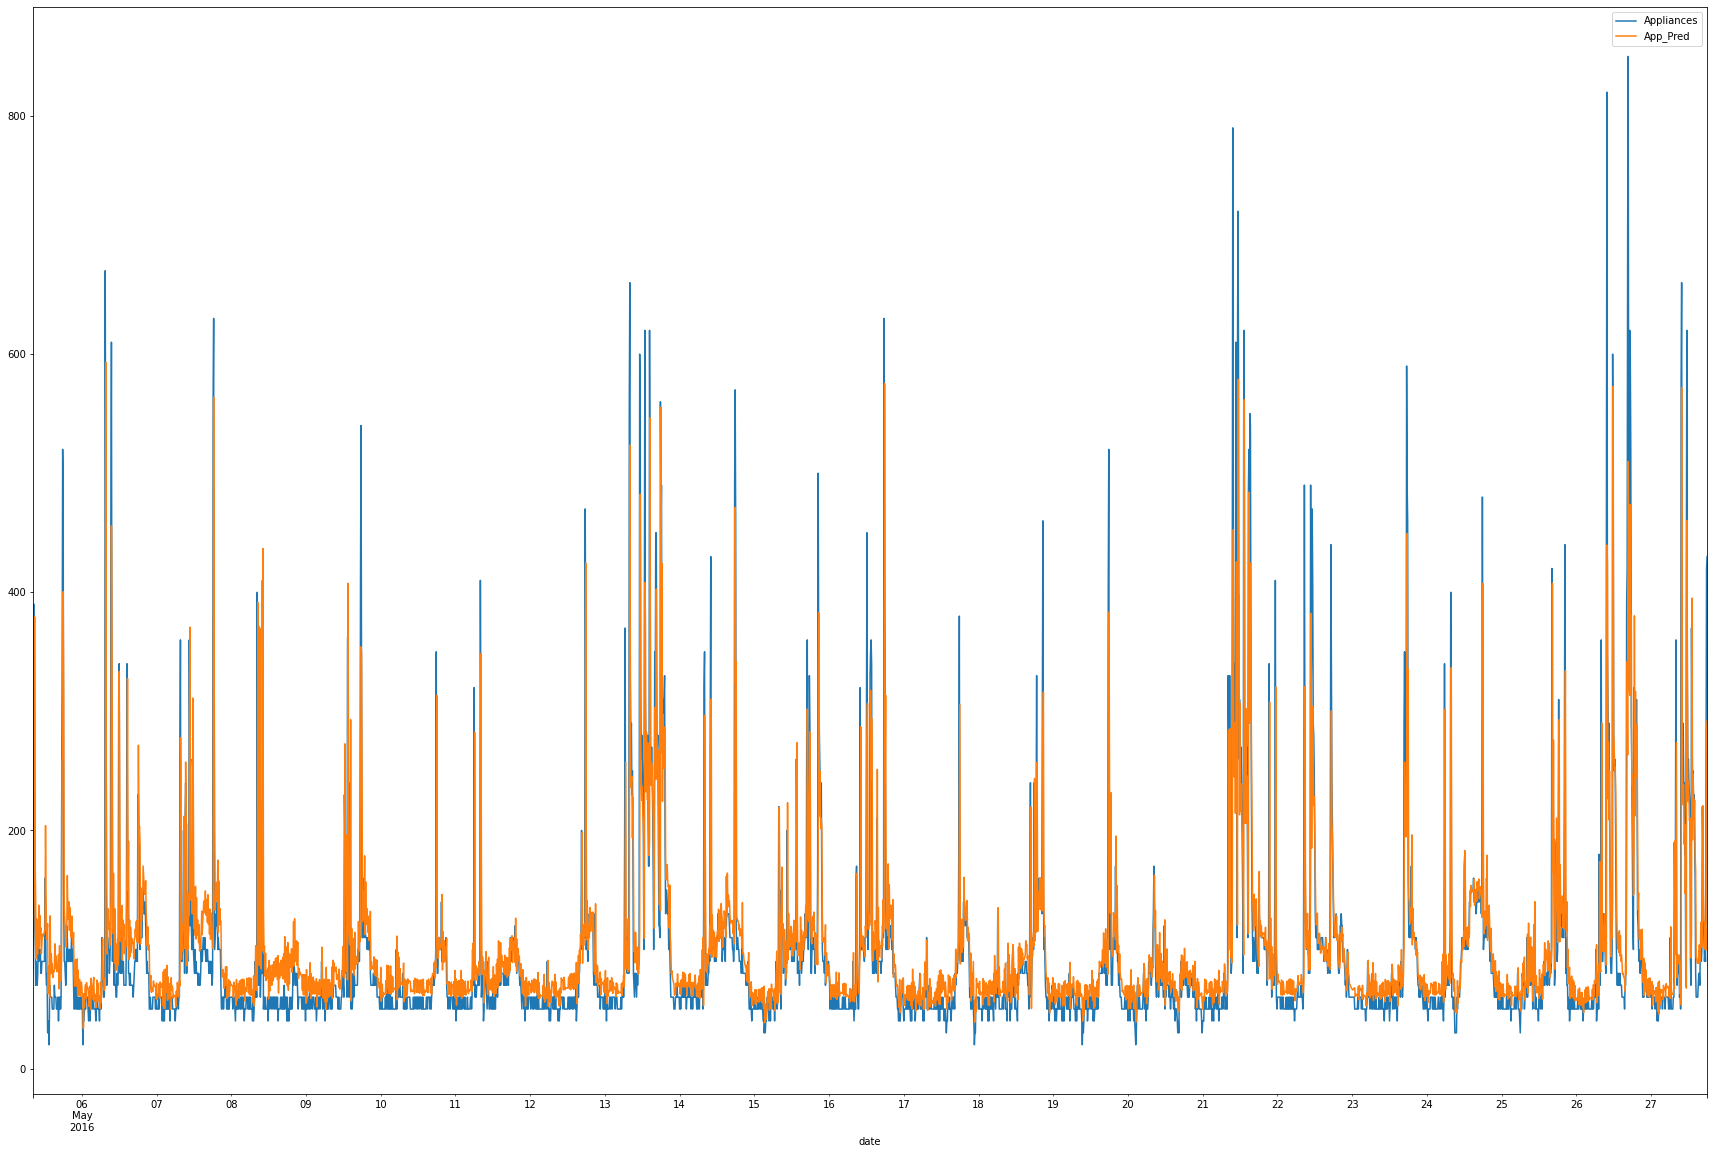

In [30]:
matplotlib.rcParams['figure.figsize'] = (30,20)
df_final[['Appliances','App_Pred']].plot()

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [34]:
#df_final[['Appliances','App_Pred']].plot()
mean_absolute_percentage_error(df_final.Appliances.values , df_final.App_Pred.values)

29.936545242658706